<a href="https://colab.research.google.com/github/iqfareez/DLWorkshop-IIUM/blob/main/Assignments/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruction

By using google colab code to access your webcam, capture three different facial expressions
of yourself.

Perform blurring of only faces in those images. *(15 Marks)*

# Answers

In [94]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode
import cv2

In [95]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

Using Haar **Cascade model** to detect faces

In [96]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [97]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  img_res = img
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      # uncomment below to see bounding boxes
      # img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      # https://stackoverflow.com/a/55647423/13617136
      sub_face = img[y:y+h, x:x+w]
      # apply a gaussian blur on this new rectangle image
      sub_face = cv2.GaussianBlur(sub_face,(45, 45), 30)
      # merge this blurry rectangle to our final image
      img_res[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face
  
  # display result image
  # cv2_imshow(img_res)

  # save image
  cv2.imwrite(filename, img)

  return filename

Image 1


<IPython.core.display.Javascript object>

(480, 640)


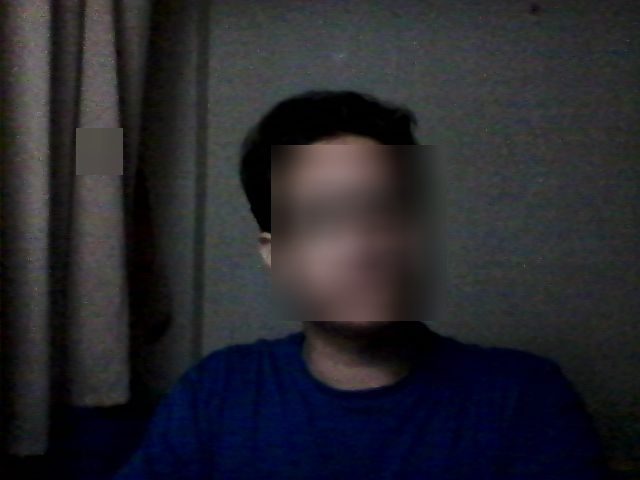

Saved to photo1.jpg

Image 2


<IPython.core.display.Javascript object>

(480, 640)


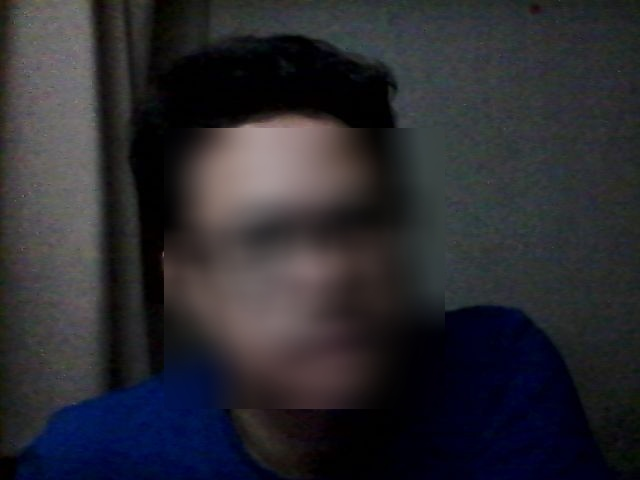

Saved to photo2.jpg

Image 3


<IPython.core.display.Javascript object>

(480, 640)


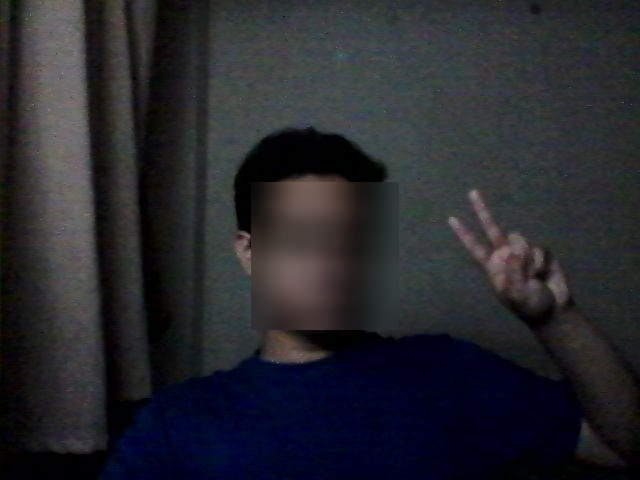

Saved to photo3.jpg



In [98]:
try:
  for i in range(3):
    print(f'Image {i+1}')
    filename = take_photo(f'photo{i+1}.jpg')
    # Show the image which was just taken.
    display(Image(filename))
    # save
    print('Saved to {}\n'.format(filename))
    
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))